In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [3]:
x_train = x_train[:500]
t_train = t_train[:500]

In [4]:
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [5]:
def __train(lr, weight_decay, epochs=50):
    network = MultiLayerNet(input_size=784,
                            hidden_size_list=[100 for _ in range(6)],
                            output_size=10,
                            weight_decay_lambda=weight_decay,
    )
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epochs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=True,
    )
    trainer.train()
    
    return trainer.test_acc_list, trainer.train_acc_list

In [6]:
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    
    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print('val_acc: %.4f | lr: %.4f, weight_decay: %.4f' %
              (val_acc_list[-1], lr, weight_decay)
    )
    
    key = 'lr: %.4f, weight_decay: %.4f' % (lr, weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

train loss:2.30903825333
=== epoch:1, train acc:0.16, test acc:0.21 ===
train loss:2.33913093825
train loss:2.3356079666
train loss:2.2884663355
train loss:2.32318382424
=== epoch:2, train acc:0.16, test acc:0.21 ===
train loss:2.28292744019
train loss:2.34390589473
train loss:2.2986540916
train loss:2.28198635672
=== epoch:3, train acc:0.16, test acc:0.22 ===
train loss:2.33245313776
train loss:2.3219563595
train loss:2.32451631459
train loss:2.29343755565
=== epoch:4, train acc:0.16, test acc:0.22 ===
train loss:2.32146761966
train loss:2.26341888712
train loss:2.34967385659
train loss:2.28353641919
=== epoch:5, train acc:0.16, test acc:0.22 ===
train loss:2.32946920462
train loss:2.33354056114
train loss:2.30527893172
train loss:2.28551583362
=== epoch:6, train acc:0.16, test acc:0.22 ===
train loss:2.32625784659
train loss:2.32453901636
train loss:2.32700374337
train loss:2.33831326773
=== epoch:7, train acc:0.16, test acc:0.22 ===
train loss:2.29262109753
train loss:2.29422859691


=== epoch:12, train acc:0.115, test acc:0.08 ===
train loss:2.40238962874
train loss:2.47394148754
train loss:2.52411044554
train loss:2.44251701589
=== epoch:13, train acc:0.115, test acc:0.08 ===
train loss:2.38870993978
train loss:2.54400296826
train loss:2.4742649154
train loss:2.4722917837
=== epoch:14, train acc:0.115, test acc:0.08 ===
train loss:2.49295696648
train loss:2.46042202382
train loss:2.56785858392
train loss:2.5307343508
=== epoch:15, train acc:0.115, test acc:0.08 ===
train loss:2.47103734026
train loss:2.5286149281
train loss:2.4590140469
train loss:2.47115295028
=== epoch:16, train acc:0.115, test acc:0.08 ===
train loss:2.37007205661
train loss:2.37572295622
train loss:2.55110549063
train loss:2.46024072905
=== epoch:17, train acc:0.115, test acc:0.08 ===
train loss:2.42960846748
train loss:2.50131468477
train loss:2.48937826821
train loss:2.48182621799
=== epoch:18, train acc:0.115, test acc:0.08 ===
train loss:2.43353766265
train loss:2.46622041446
train loss:2

train loss:2.36608048603
train loss:2.37148473255
train loss:2.37104342703
train loss:2.32615436522
=== epoch:22, train acc:0.0975, test acc:0.1 ===
train loss:2.37238649315
train loss:2.39447601118
train loss:2.36534620578
train loss:2.33906980489
=== epoch:23, train acc:0.0975, test acc:0.1 ===
train loss:2.35977059077
train loss:2.34232169784
train loss:2.31684861164
train loss:2.36854526477
=== epoch:24, train acc:0.0975, test acc:0.1 ===
train loss:2.43877391808
train loss:2.34209781522
train loss:2.38316429818
train loss:2.35697773322
=== epoch:25, train acc:0.1, test acc:0.1 ===
train loss:2.37826681686
train loss:2.38090667299
train loss:2.3249714109
train loss:2.36475835873
=== epoch:26, train acc:0.1, test acc:0.1 ===
train loss:2.34195135395
train loss:2.35164254041
train loss:2.43150104412
train loss:2.40176658235
=== epoch:27, train acc:0.1, test acc:0.1 ===
train loss:2.38894849085
train loss:2.32608906833
train loss:2.36031875294
train loss:2.39468152731
=== epoch:28, tr

train loss:2.03261431008
train loss:2.00910029686
train loss:2.00883153347
train loss:2.05181826433
=== epoch:30, train acc:0.4875, test acc:0.36 ===
train loss:1.97894993127
train loss:2.0734799928
train loss:1.99312411066
train loss:1.92477873797
=== epoch:31, train acc:0.5175, test acc:0.38 ===
train loss:1.99384526624
train loss:2.03370427387
train loss:2.03207653773
train loss:1.97837432541
=== epoch:32, train acc:0.5175, test acc:0.38 ===
train loss:1.94665161524
train loss:2.0485659704
train loss:1.98775096725
train loss:2.02054153029
=== epoch:33, train acc:0.525, test acc:0.41 ===
train loss:1.94122372997
train loss:2.06149959203
train loss:1.92978123745
train loss:1.89464548539
=== epoch:34, train acc:0.5325, test acc:0.43 ===
train loss:1.96666988628
train loss:2.01380961881
train loss:1.91089860792
train loss:1.89616173164
=== epoch:35, train acc:0.54, test acc:0.42 ===
train loss:1.96402526264
train loss:1.92371803742
train loss:1.95505138725
train loss:1.86872178675
=== e

train loss:2.3815810706
train loss:2.34231147439
=== epoch:41, train acc:0.1175, test acc:0.11 ===
train loss:2.37139203311
train loss:2.34804480942
train loss:2.35159856129
train loss:2.36605373125
=== epoch:42, train acc:0.1175, test acc:0.11 ===
train loss:2.30158904048
train loss:2.35965447409
train loss:2.35887923023
train loss:2.34174566806
=== epoch:43, train acc:0.1175, test acc:0.11 ===
train loss:2.33244205038
train loss:2.32553396583
train loss:2.33539318782
train loss:2.36679827582
=== epoch:44, train acc:0.1175, test acc:0.11 ===
train loss:2.32861477174
train loss:2.32649223388
train loss:2.38305057288
train loss:2.34455771832
=== epoch:45, train acc:0.1175, test acc:0.11 ===
train loss:2.34526145522
train loss:2.33877992252
train loss:2.37161713225
train loss:2.35421297261
=== epoch:46, train acc:0.1175, test acc:0.11 ===
train loss:2.31764744455
train loss:2.38893501964
train loss:2.33448750007
train loss:2.32869395044
=== epoch:47, train acc:0.1175, test acc:0.11 ===
t

train loss:2.41603824747
=== epoch:2, train acc:0.1, test acc:0.09 ===
train loss:2.38743203662
train loss:2.39174796979
train loss:2.36672571111
train loss:2.38295973223
=== epoch:3, train acc:0.1, test acc:0.09 ===
train loss:2.33343686311
train loss:2.31173164618
train loss:2.38137543484
train loss:2.40409728022
=== epoch:4, train acc:0.1, test acc:0.09 ===
train loss:2.38300607622
train loss:2.36869972464
train loss:2.40617093522
train loss:2.36181420125
=== epoch:5, train acc:0.1, test acc:0.09 ===
train loss:2.35390194213
train loss:2.36742491481
train loss:2.3928647708
train loss:2.36271291495
=== epoch:6, train acc:0.1, test acc:0.09 ===
train loss:2.4242104159
train loss:2.36600018181
train loss:2.44909736687
train loss:2.43988522641
=== epoch:7, train acc:0.1, test acc:0.09 ===
train loss:2.37617001019
train loss:2.36158054318
train loss:2.41128958516
train loss:2.40363676565
=== epoch:8, train acc:0.1, test acc:0.09 ===
train loss:2.36880397996
train loss:2.34614030836
train

train loss:2.18060287201
train loss:2.25118824794
train loss:2.19121863527
train loss:2.24023254164
=== epoch:14, train acc:0.22, test acc:0.21 ===
train loss:2.20424203152
train loss:2.25532373251
train loss:2.21108579114
train loss:2.1919135628
=== epoch:15, train acc:0.22, test acc:0.19 ===
train loss:2.21650418665
train loss:2.16742237057
train loss:2.18453920438
train loss:2.18506286578
=== epoch:16, train acc:0.235, test acc:0.21 ===
train loss:2.16613996737
train loss:2.24344667521
train loss:2.17856174057
train loss:2.18558597925
=== epoch:17, train acc:0.235, test acc:0.21 ===
train loss:2.19244856639
train loss:2.2135598927
train loss:2.22320328806
train loss:2.22737732714
=== epoch:18, train acc:0.235, test acc:0.22 ===
train loss:2.12904324951
train loss:2.14948405051
train loss:2.14691954444
train loss:2.19416356321
=== epoch:19, train acc:0.235, test acc:0.24 ===
train loss:2.11248237607
train loss:2.13502068598
train loss:2.16068700082
train loss:2.15942222151
=== epoch:

train loss:2.43672015958
train loss:2.47801537441
train loss:2.39466322672
train loss:2.3583990789
=== epoch:26, train acc:0.11, test acc:0.11 ===
train loss:2.44156233036
train loss:2.50587979011
train loss:2.31367819502
train loss:2.46028958005
=== epoch:27, train acc:0.11, test acc:0.11 ===
train loss:2.38407861891
train loss:2.33045459569
train loss:2.30268831355
train loss:2.419051212
=== epoch:28, train acc:0.11, test acc:0.11 ===
train loss:2.32522616532
train loss:2.35610265415
train loss:2.47481995572
train loss:2.31223874952
=== epoch:29, train acc:0.11, test acc:0.11 ===
train loss:2.43575828644
train loss:2.48595296967
train loss:2.43871810496
train loss:2.43857190682
=== epoch:30, train acc:0.11, test acc:0.11 ===
train loss:2.34424878582
train loss:2.36758685563
train loss:2.44813147435
train loss:2.38988288812
=== epoch:31, train acc:0.11, test acc:0.11 ===
train loss:2.45882033097
train loss:2.32890992483
train loss:2.35516445181
train loss:2.47087278484
=== epoch:32, t

train loss:0.880619199305
train loss:0.902947215496
train loss:0.852445217874
=== epoch:38, train acc:0.835, test acc:0.76 ===
train loss:0.818794935044
train loss:0.750917097003
train loss:0.783746508799
train loss:0.818091437327
=== epoch:39, train acc:0.84, test acc:0.77 ===
train loss:0.820289609446
train loss:0.834561346564
train loss:0.836912815988
train loss:0.864859227284
=== epoch:40, train acc:0.8325, test acc:0.77 ===
train loss:0.793389870683
train loss:0.828827159698
train loss:0.820542881531
train loss:0.826515103866
=== epoch:41, train acc:0.8625, test acc:0.81 ===
train loss:0.749423625163
train loss:0.704527356876
train loss:0.707736879404
train loss:0.703702848496
=== epoch:42, train acc:0.8625, test acc:0.81 ===
train loss:0.622680551174
train loss:0.633424004749
train loss:0.62784684194
train loss:0.667792342299
=== epoch:43, train acc:0.8375, test acc:0.77 ===
train loss:0.713925808995
train loss:0.653184323307
train loss:0.720428922265
train loss:0.588352853382
==

train loss:2.3723660504
train loss:2.33704342317
=============== Final Test Accuracy ===============
test acc:0.16
val_acc: 0.1600 | lr: 0.0000, weight_decay: 0.0000
train loss:2.48723810403
=== epoch:1, train acc:0.1125, test acc:0.04 ===
train loss:2.46544151871
train loss:2.51599523397
train loss:2.53152257613
train loss:2.53338890134
=== epoch:2, train acc:0.1125, test acc:0.04 ===
train loss:2.37302049012
train loss:2.45617062296
train loss:2.5852666418
train loss:2.48246648517
=== epoch:3, train acc:0.1125, test acc:0.04 ===
train loss:2.51452366657
train loss:2.55296460512
train loss:2.49903967845
train loss:2.54613059031
=== epoch:4, train acc:0.1125, test acc:0.04 ===
train loss:2.44482397583
train loss:2.51181294994
train loss:2.63617706674
train loss:2.52370252698
=== epoch:5, train acc:0.1125, test acc:0.04 ===
train loss:2.48402060634
train loss:2.58393609757
train loss:2.68062944289
train loss:2.55936420427
=== epoch:6, train acc:0.1125, test acc:0.04 ===
train loss:2.550

train loss:2.39627675968
=== epoch:12, train acc:0.0575, test acc:0.08 ===
train loss:2.30016099403
train loss:2.31311811485
train loss:2.32286924553
train loss:2.34422836034
=== epoch:13, train acc:0.055, test acc:0.08 ===
train loss:2.3268021401
train loss:2.34618429976
train loss:2.29659293427
train loss:2.31264961489
=== epoch:14, train acc:0.0575, test acc:0.08 ===
train loss:2.29515609893
train loss:2.37648953522
train loss:2.35816788525
train loss:2.37852199251
=== epoch:15, train acc:0.06, test acc:0.08 ===
train loss:2.37096884703
train loss:2.40856266322
train loss:2.30686306608
train loss:2.34189730066
=== epoch:16, train acc:0.06, test acc:0.08 ===
train loss:2.32348057817
train loss:2.40074191995
train loss:2.36574474228
train loss:2.34910222297
=== epoch:17, train acc:0.06, test acc:0.08 ===
train loss:2.31076803516
train loss:2.38738373574
train loss:2.32387812506
train loss:2.36399251022
=== epoch:18, train acc:0.06, test acc:0.08 ===
train loss:2.33826666522
train loss

=== epoch:23, train acc:0.07, test acc:0.06 ===
train loss:2.34774266868
train loss:2.33136070372
train loss:2.36146100363
train loss:2.38725462781
=== epoch:24, train acc:0.07, test acc:0.06 ===
train loss:2.4214216942
train loss:2.32753025583
train loss:2.36904074644
train loss:2.37378405764
=== epoch:25, train acc:0.07, test acc:0.06 ===
train loss:2.36601083097
train loss:2.42749501289
train loss:2.36217257362
train loss:2.33852608059
=== epoch:26, train acc:0.07, test acc:0.06 ===
train loss:2.35540173244
train loss:2.36960868678
train loss:2.39439866365
train loss:2.38284143165
=== epoch:27, train acc:0.07, test acc:0.06 ===
train loss:2.4111177524
train loss:2.39795511449
train loss:2.37757717111
train loss:2.33592483091
=== epoch:28, train acc:0.07, test acc:0.06 ===
train loss:2.3570192458
train loss:2.35012508106
train loss:2.37664483801
train loss:2.31479675162
=== epoch:29, train acc:0.07, test acc:0.06 ===
train loss:2.40334726747
train loss:2.38035102894
train loss:2.3266

train loss:2.3426591842
train loss:2.32791509509
train loss:2.31864540526
train loss:2.36227639955
=== epoch:35, train acc:0.1025, test acc:0.09 ===
train loss:2.35888899606
train loss:2.34211126088
train loss:2.37813377727
train loss:2.35476610268
=== epoch:36, train acc:0.1025, test acc:0.09 ===
train loss:2.31287132876
train loss:2.40864780428
train loss:2.36233732494
train loss:2.3278217539
=== epoch:37, train acc:0.1025, test acc:0.09 ===
train loss:2.32446713623
train loss:2.3464141278
train loss:2.37498082604
train loss:2.34504189491
=== epoch:38, train acc:0.1025, test acc:0.09 ===
train loss:2.32481352199
train loss:2.33429444839
train loss:2.36955079524
train loss:2.34919587898
=== epoch:39, train acc:0.1025, test acc:0.09 ===
train loss:2.37421011744
train loss:2.37528228934
train loss:2.36388256762
train loss:2.3811940071
=== epoch:40, train acc:0.1025, test acc:0.09 ===
train loss:2.35926736859
train loss:2.35168603626
train loss:2.33573189714
train loss:2.37554215284
=== 

=== epoch:44, train acc:0.105, test acc:0.09 ===
train loss:2.39380435513
train loss:2.36157028243
train loss:2.4037004564
train loss:2.36021908703
=== epoch:45, train acc:0.105, test acc:0.09 ===
train loss:2.37768654737
train loss:2.32906421943
train loss:2.43727752683
train loss:2.41044307611
=== epoch:46, train acc:0.105, test acc:0.09 ===
train loss:2.40270574782
train loss:2.36624235246
train loss:2.42232443586
train loss:2.37929960452
=== epoch:47, train acc:0.105, test acc:0.09 ===
train loss:2.36726505758
train loss:2.42863173308
train loss:2.32230324071
train loss:2.44129287805
=== epoch:48, train acc:0.105, test acc:0.09 ===
train loss:2.47433056751
train loss:2.40717679739
train loss:2.33581559988
train loss:2.37348022805
=== epoch:49, train acc:0.105, test acc:0.09 ===
train loss:2.39292964568
train loss:2.36578653122
train loss:2.41312578434
train loss:2.41258139079
=== epoch:50, train acc:0.105, test acc:0.09 ===
train loss:2.36539518947
train loss:2.4615592382
train los

=== epoch:5, train acc:0.0775, test acc:0.06 ===
train loss:2.38355141672
train loss:2.3565626295
train loss:2.42519111529
train loss:2.4049880298
=== epoch:6, train acc:0.0775, test acc:0.06 ===
train loss:2.3105946413
train loss:2.42469625061
train loss:2.38785161497
train loss:2.37840758684
=== epoch:7, train acc:0.0775, test acc:0.06 ===
train loss:2.44021868925
train loss:2.34788452141
train loss:2.36904008753
train loss:2.38120507337
=== epoch:8, train acc:0.0775, test acc:0.06 ===
train loss:2.40293166665
train loss:2.36494703171
train loss:2.3716526405
train loss:2.37037192151
=== epoch:9, train acc:0.0775, test acc:0.06 ===
train loss:2.40161232068
train loss:2.36792710267
train loss:2.39655930954
train loss:2.40025100589
=== epoch:10, train acc:0.0775, test acc:0.06 ===
train loss:2.34661470394
train loss:2.40390113977
train loss:2.3809107255
train loss:2.39337368394
=== epoch:11, train acc:0.0775, test acc:0.06 ===
train loss:2.36980121134
train loss:2.38469065218
train loss

train loss:2.32273983946
train loss:2.3145857225
=== epoch:16, train acc:0.0925, test acc:0.09 ===
train loss:2.29812998736
train loss:2.34403296455
train loss:2.37918788481
train loss:2.28811950898
=== epoch:17, train acc:0.0925, test acc:0.09 ===
train loss:2.34027979089
train loss:2.32895976581
train loss:2.3662883823
train loss:2.32038486548
=== epoch:18, train acc:0.0925, test acc:0.09 ===
train loss:2.27330551522
train loss:2.33455612144
train loss:2.34326976348
train loss:2.32043689147
=== epoch:19, train acc:0.0925, test acc:0.09 ===
train loss:2.34673072999
train loss:2.28755621754
train loss:2.33120499557
train loss:2.3143832448
=== epoch:20, train acc:0.0925, test acc:0.09 ===
train loss:2.3266976649
train loss:2.32808357282
train loss:2.3129142451
train loss:2.32597189933
=== epoch:21, train acc:0.0925, test acc:0.09 ===
train loss:2.36328412376
train loss:2.30948003318
train loss:2.30859030227
train loss:2.29626164931
=== epoch:22, train acc:0.0925, test acc:0.09 ===
train

train loss:2.16036573089
train loss:2.14699388724
=== epoch:27, train acc:0.2925, test acc:0.23 ===
train loss:2.16456315505
train loss:2.1409039867
train loss:2.19431738147
train loss:2.14150839202
=== epoch:28, train acc:0.3, test acc:0.24 ===
train loss:2.16365460045
train loss:2.11090301305
train loss:2.18162453845
train loss:2.12394504668
=== epoch:29, train acc:0.305, test acc:0.24 ===
train loss:2.13387891436
train loss:2.12246061095
train loss:2.19497900848
train loss:2.0924676012
=== epoch:30, train acc:0.3125, test acc:0.25 ===
train loss:2.13978078517
train loss:2.12829208003
train loss:2.17828009005
train loss:2.13509426266
=== epoch:31, train acc:0.3125, test acc:0.24 ===
train loss:2.11456913769
train loss:2.13232366682
train loss:2.07201049269
train loss:2.0965823433
=== epoch:32, train acc:0.33, test acc:0.26 ===
train loss:2.05139932694
train loss:2.15487227469
train loss:2.09060840507
train loss:2.11279517857
=== epoch:33, train acc:0.335, test acc:0.27 ===
train loss

train loss:2.47359544191
=== epoch:38, train acc:0.0975, test acc:0.13 ===
train loss:2.34767006847
train loss:2.39579821247
train loss:2.43622199459
train loss:2.33471828595
=== epoch:39, train acc:0.0975, test acc:0.13 ===
train loss:2.42452424313
train loss:2.32624471578
train loss:2.39975681357
train loss:2.47620262447
=== epoch:40, train acc:0.0975, test acc:0.13 ===
train loss:2.45428223265
train loss:2.44234741574
train loss:2.49517868468
train loss:2.41326547122
=== epoch:41, train acc:0.0975, test acc:0.13 ===
train loss:2.3921861801
train loss:2.39702643141
train loss:2.34884530789
train loss:2.41995645004
=== epoch:42, train acc:0.0975, test acc:0.13 ===
train loss:2.32429484419
train loss:2.44170652399
train loss:2.35539846333
train loss:2.49831779504
=== epoch:43, train acc:0.0975, test acc:0.13 ===
train loss:2.4106194562
train loss:2.34445985555
train loss:2.3637110026
train loss:2.38883583996
=== epoch:44, train acc:0.0975, test acc:0.13 ===
train loss:2.44471315163
tra

train loss:2.40360632567
=== epoch:49, train acc:0.11, test acc:0.05 ===
train loss:2.47196377298
train loss:2.41681278617
train loss:2.41372177069
train loss:2.47151852457
=== epoch:50, train acc:0.11, test acc:0.05 ===
train loss:2.41521618571
train loss:2.43876488206
train loss:2.46654133344
=============== Final Test Accuracy ===============
test acc:0.05
val_acc: 0.0500 | lr: 0.0000, weight_decay: 0.0000
train loss:2.36968000305
=== epoch:1, train acc:0.0775, test acc:0.11 ===
train loss:2.38305559393
train loss:2.33338754648
train loss:2.34666219652
train loss:2.31782200481
=== epoch:2, train acc:0.0775, test acc:0.11 ===
train loss:2.37492521182
train loss:2.39690708001
train loss:2.36078720967
train loss:2.40583645754
=== epoch:3, train acc:0.0775, test acc:0.11 ===
train loss:2.34344550896
train loss:2.39721590095
train loss:2.38042088984
train loss:2.2917718851
=== epoch:4, train acc:0.0775, test acc:0.11 ===
train loss:2.37621543434
train loss:2.31346278591
train loss:2.3682

train loss:2.21466659691
train loss:2.21218993573
train loss:2.18971478789
=== epoch:10, train acc:0.225, test acc:0.11 ===
train loss:2.20326671721
train loss:2.1867077343
train loss:2.14607207617
train loss:2.23462460815
=== epoch:11, train acc:0.245, test acc:0.11 ===
train loss:2.21819843241
train loss:2.17879343312
train loss:2.21898752808
train loss:2.11375754306
=== epoch:12, train acc:0.26, test acc:0.11 ===
train loss:2.15192216786
train loss:2.21079362213
train loss:2.18167225951
train loss:2.09292396726
=== epoch:13, train acc:0.275, test acc:0.14 ===
train loss:2.13415258548
train loss:2.15537732653
train loss:2.13424124726
train loss:2.18278009639
=== epoch:14, train acc:0.2825, test acc:0.14 ===
train loss:2.17575768127
train loss:2.13989152704
train loss:2.16418013932
train loss:2.13641061273
=== epoch:15, train acc:0.315, test acc:0.15 ===
train loss:2.11351670169
train loss:2.1734164381
train loss:2.11441699041
train loss:2.14158257925
=== epoch:16, train acc:0.325, te

=== epoch:21, train acc:0.1075, test acc:0.1 ===
train loss:2.18790158452
train loss:2.25745745468
train loss:2.31366422357
train loss:2.3513541939
=== epoch:22, train acc:0.1075, test acc:0.1 ===
train loss:2.31188697412
train loss:2.32300233565
train loss:2.30210589814
train loss:2.34093522962
=== epoch:23, train acc:0.1075, test acc:0.1 ===
train loss:2.30770879252
train loss:2.29219097863
train loss:2.28362877012
train loss:2.31153676682
=== epoch:24, train acc:0.1075, test acc:0.1 ===
train loss:2.28407619364
train loss:2.32939949971
train loss:2.2854118841
train loss:2.32096181093
=== epoch:25, train acc:0.1075, test acc:0.1 ===
train loss:2.3318348062
train loss:2.26667157601
train loss:2.24270082989
train loss:2.31899445119
=== epoch:26, train acc:0.1075, test acc:0.1 ===
train loss:2.27695591568
train loss:2.33649271871
train loss:2.33554176471
train loss:2.34485845377
=== epoch:27, train acc:0.1075, test acc:0.1 ===
train loss:2.29479524382
train loss:2.32467980748
train loss

=== epoch:32, train acc:0.125, test acc:0.14 ===
train loss:2.28660233132
train loss:2.31932092959
train loss:2.30475213455
train loss:2.30062329564
=== epoch:33, train acc:0.125, test acc:0.14 ===
train loss:2.27892945593
train loss:2.30138639734
train loss:2.31816492919
train loss:2.29905496263
=== epoch:34, train acc:0.125, test acc:0.14 ===
train loss:2.29963797083
train loss:2.28350425929
train loss:2.31945414081
train loss:2.3060497754
=== epoch:35, train acc:0.125, test acc:0.14 ===
train loss:2.32941230194
train loss:2.31592061088
train loss:2.31001774371
train loss:2.28782268263
=== epoch:36, train acc:0.125, test acc:0.14 ===
train loss:2.32688885319
train loss:2.30236788667
train loss:2.28700196338
train loss:2.30511211987
=== epoch:37, train acc:0.125, test acc:0.14 ===
train loss:2.24971525141
train loss:2.27939599633
train loss:2.3212655947
train loss:2.32911692912
=== epoch:38, train acc:0.1275, test acc:0.14 ===
train loss:2.30817392195
train loss:2.28198601316
train lo

train loss:2.28100060297
train loss:2.28814250995
train loss:2.21093696712
train loss:2.20966603705
=== epoch:44, train acc:0.165, test acc:0.13 ===
train loss:2.28739501549
train loss:2.31014705058
train loss:2.27494539664
train loss:2.29488383998
=== epoch:45, train acc:0.165, test acc:0.13 ===
train loss:2.33262392829
train loss:2.29467829328
train loss:2.2882105271
train loss:2.26865000854
=== epoch:46, train acc:0.165, test acc:0.13 ===
train loss:2.23706162234
train loss:2.22443490879
train loss:2.21666221386
train loss:2.22239234082
=== epoch:47, train acc:0.165, test acc:0.13 ===
train loss:2.24956304096
train loss:2.22919545599
train loss:2.26139464377
train loss:2.19503827751
=== epoch:48, train acc:0.1675, test acc:0.13 ===
train loss:2.299392502
train loss:2.25272625819
train loss:2.26596307146
train loss:2.20534256111
=== epoch:49, train acc:0.17, test acc:0.13 ===
train loss:2.22513989311
train loss:2.31049452655
train loss:2.30530375365
train loss:2.1960209071
=== epoch:

train loss:2.33136871513
train loss:2.35900702505
train loss:2.28119756425
=== epoch:5, train acc:0.1375, test acc:0.15 ===
train loss:2.27272312559
train loss:2.25460306882
train loss:2.22804403658
train loss:2.23498009254
=== epoch:6, train acc:0.145, test acc:0.17 ===
train loss:2.19327075229
train loss:2.18157462097
train loss:2.2247726536
train loss:2.30354101051
=== epoch:7, train acc:0.1575, test acc:0.19 ===
train loss:2.21380034637
train loss:2.2490832211
train loss:2.22177632365
train loss:2.27736949897
=== epoch:8, train acc:0.1625, test acc:0.2 ===
train loss:2.22238932532
train loss:2.29179699568
train loss:2.17201365401
train loss:2.16929439104
=== epoch:9, train acc:0.19, test acc:0.22 ===
train loss:2.22906680847
train loss:2.25195503808
train loss:2.19784743396
train loss:2.13951728467
=== epoch:10, train acc:0.2, test acc:0.23 ===
train loss:2.16192938784
train loss:2.24052363196
train loss:2.17002592672
train loss:2.16730535261
=== epoch:11, train acc:0.21, test acc:

train loss:2.38055830139
train loss:2.35510718748
train loss:2.3363730487
train loss:2.34561044235
=== epoch:17, train acc:0.105, test acc:0.07 ===
train loss:2.29128652457
train loss:2.36439061484
train loss:2.29446078088
train loss:2.32560624002
=== epoch:18, train acc:0.105, test acc:0.07 ===
train loss:2.38838193005
train loss:2.27113728056
train loss:2.35298608715
train loss:2.32772557756
=== epoch:19, train acc:0.105, test acc:0.07 ===
train loss:2.32838673779
train loss:2.33350042889
train loss:2.36406400443
train loss:2.37078506591
=== epoch:20, train acc:0.105, test acc:0.07 ===
train loss:2.31335403038
train loss:2.33707091344
train loss:2.34628868014
train loss:2.31164573986
=== epoch:21, train acc:0.105, test acc:0.07 ===
train loss:2.30032767118
train loss:2.27000409533
train loss:2.28981702432
train loss:2.32077224025
=== epoch:22, train acc:0.105, test acc:0.07 ===
train loss:2.36118065732
train loss:2.33391067894
train loss:2.3041713451
train loss:2.37717715188
=== epoc

train loss:2.39949609496
=== epoch:28, train acc:0.14, test acc:0.07 ===
train loss:2.38747461075
train loss:2.38348779211
train loss:2.33949255028
train loss:2.3849774189
=== epoch:29, train acc:0.14, test acc:0.07 ===
train loss:2.37176647644
train loss:2.34892672877
train loss:2.45398226231
train loss:2.41292159654
=== epoch:30, train acc:0.14, test acc:0.07 ===
train loss:2.35225214223
train loss:2.42183594852
train loss:2.38271515721
train loss:2.34313802055
=== epoch:31, train acc:0.14, test acc:0.07 ===
train loss:2.42925332067
train loss:2.31330333547
train loss:2.36295231018
train loss:2.39665351844
=== epoch:32, train acc:0.14, test acc:0.07 ===
train loss:2.36492270337
train loss:2.36349548851
train loss:2.4080391625
train loss:2.40472561065
=== epoch:33, train acc:0.14, test acc:0.07 ===
train loss:2.35555895167
train loss:2.36399762171
train loss:2.32020605352
train loss:2.33274878983
=== epoch:34, train acc:0.14, test acc:0.07 ===
train loss:2.37625517279
train loss:2.293

train loss:2.26943892315
train loss:2.26660743704
train loss:2.26214020354
train loss:2.23412797491
=== epoch:40, train acc:0.0975, test acc:0.05 ===
train loss:2.27177081585
train loss:2.2319631138
train loss:2.31561316573
train loss:2.24429095433
=== epoch:41, train acc:0.0975, test acc:0.05 ===
train loss:2.31264093955
train loss:2.27481503773
train loss:2.25826838316
train loss:2.24468229828
=== epoch:42, train acc:0.1, test acc:0.05 ===
train loss:2.23671005847
train loss:2.26066851801
train loss:2.24058277341
train loss:2.26806021739
=== epoch:43, train acc:0.105, test acc:0.05 ===
train loss:2.21267545346
train loss:2.27631208677
train loss:2.29013958872
train loss:2.23662251911
=== epoch:44, train acc:0.1125, test acc:0.05 ===
train loss:2.28760897266
train loss:2.27133801336
train loss:2.23413039089
train loss:2.26057354829
=== epoch:45, train acc:0.1125, test acc:0.06 ===
train loss:2.23195581154
train loss:2.2380335871
train loss:2.23312448743
train loss:2.21992102708
=== ep

train loss:2.42349014603
=== epoch:1, train acc:0.115, test acc:0.1 ===
train loss:2.41439728243
train loss:2.59501732787
train loss:2.53783868524
train loss:2.46054484037
=== epoch:2, train acc:0.115, test acc:0.1 ===
train loss:2.43065527099
train loss:2.48040677215
train loss:2.43214175485
train loss:2.42224872071
=== epoch:3, train acc:0.115, test acc:0.1 ===
train loss:2.48444332702
train loss:2.44392796123
train loss:2.44923489663
train loss:2.50557973319
=== epoch:4, train acc:0.115, test acc:0.1 ===
train loss:2.5010489567
train loss:2.39195795089
train loss:2.40676307543
train loss:2.46433776917
=== epoch:5, train acc:0.115, test acc:0.1 ===
train loss:2.48365733276
train loss:2.46947831481
train loss:2.45389640834
train loss:2.47955449742
=== epoch:6, train acc:0.115, test acc:0.1 ===
train loss:2.63625911435
train loss:2.28076873021
train loss:2.58003204198
train loss:2.43744978644
=== epoch:7, train acc:0.115, test acc:0.1 ===
train loss:2.53494089386
train loss:2.462332178

train loss:2.08127777157
train loss:2.05967071662
train loss:2.15644974043
=== epoch:12, train acc:0.285, test acc:0.24 ===
train loss:2.13819777847
train loss:2.07351458678
train loss:2.09639870607
train loss:2.12555474706
=== epoch:13, train acc:0.3075, test acc:0.25 ===
train loss:2.0909006038
train loss:2.04617653013
train loss:2.13116221512
train loss:2.06688049409
=== epoch:14, train acc:0.31, test acc:0.28 ===
train loss:2.0705844379
train loss:2.05094514615
train loss:2.03140602444
train loss:2.01272791659
=== epoch:15, train acc:0.3375, test acc:0.33 ===
train loss:2.07875629153
train loss:1.95571839834
train loss:2.00400150994
train loss:2.04838886475
=== epoch:16, train acc:0.3775, test acc:0.39 ===
train loss:2.01056647841
train loss:2.01625166365
train loss:1.99988680724
train loss:1.9485629984
=== epoch:17, train acc:0.395, test acc:0.46 ===
train loss:1.98869877992
train loss:1.97746777492
train loss:1.97562759931
train loss:1.97178225982
=== epoch:18, train acc:0.445, t

train loss:1.35279478682
train loss:1.43849579869
train loss:1.5127548759
=== epoch:24, train acc:0.65, test acc:0.53 ===
train loss:1.38716683504
train loss:1.41534023966
train loss:1.33539918039
train loss:1.37159180775
=== epoch:25, train acc:0.675, test acc:0.55 ===
train loss:1.20590578886
train loss:1.49154647719
train loss:1.32546384465
train loss:1.37734655722
=== epoch:26, train acc:0.7075, test acc:0.55 ===
train loss:1.24471663656
train loss:1.19088590933
train loss:1.20583703575
train loss:1.15564700985
=== epoch:27, train acc:0.6975, test acc:0.53 ===
train loss:1.19265078897
train loss:1.19993285476
train loss:1.26724503835
train loss:1.17677188836
=== epoch:28, train acc:0.7075, test acc:0.58 ===
train loss:1.15210723153
train loss:1.01264322253
train loss:1.21107660194
train loss:1.1074141097
=== epoch:29, train acc:0.73, test acc:0.61 ===
train loss:1.0892020783
train loss:1.25059662775
train loss:1.01169973172
train loss:1.09802815151
=== epoch:30, train acc:0.7575, t

=== epoch:36, train acc:0.07, test acc:0.07 ===
train loss:2.34935325788
train loss:2.30228218168
train loss:2.31729339266
train loss:2.43844764839
=== epoch:37, train acc:0.0725, test acc:0.07 ===
train loss:2.38179153414
train loss:2.42482884929
train loss:2.38282349159
train loss:2.34651600663
=== epoch:38, train acc:0.0725, test acc:0.07 ===
train loss:2.3045478181
train loss:2.36517083083
train loss:2.36103164655
train loss:2.38196217717
=== epoch:39, train acc:0.0725, test acc:0.07 ===
train loss:2.40272197793
train loss:2.34468458475
train loss:2.36230718942
train loss:2.42826736967
=== epoch:40, train acc:0.0725, test acc:0.07 ===
train loss:2.34240559674
train loss:2.38770197393
train loss:2.37001470798
train loss:2.3609317565
=== epoch:41, train acc:0.0725, test acc:0.07 ===
train loss:2.31806642297
train loss:2.33754794521
train loss:2.34738873528
train loss:2.3086951516
=== epoch:42, train acc:0.0725, test acc:0.07 ===
train loss:2.33047616871
train loss:2.35592450103
train

train loss:2.33938923256
train loss:2.3896525001
=== epoch:48, train acc:0.13, test acc:0.13 ===
train loss:2.30388009034
train loss:2.35478330552
train loss:2.34056054751
train loss:2.38036028646
=== epoch:49, train acc:0.1275, test acc:0.13 ===
train loss:2.39926110373
train loss:2.31988705781
train loss:2.39171975012
train loss:2.34586763675
=== epoch:50, train acc:0.1275, test acc:0.13 ===
train loss:2.45528915098
train loss:2.32522616401
train loss:2.31487245802
=============== Final Test Accuracy ===============
test acc:0.13
val_acc: 0.1300 | lr: 0.0001, weight_decay: 0.0000
train loss:2.37637423582
=== epoch:1, train acc:0.105, test acc:0.07 ===
train loss:2.40402922003
train loss:2.39920197342
train loss:2.38052034721
train loss:2.41847983906
=== epoch:2, train acc:0.105, test acc:0.07 ===
train loss:2.44820660331
train loss:2.3865718015
train loss:2.36412785018
train loss:2.38300617754
=== epoch:3, train acc:0.105, test acc:0.07 ===
train loss:2.34371374161
train loss:2.39582

=== epoch:8, train acc:0.155, test acc:0.09 ===
train loss:2.29743718161
train loss:2.29906934149
train loss:2.31698727181
train loss:2.27352290072
=== epoch:9, train acc:0.1575, test acc:0.09 ===
train loss:2.28342939565
train loss:2.33922295614
train loss:2.23217831775
train loss:2.27706137345
=== epoch:10, train acc:0.1575, test acc:0.09 ===
train loss:2.31003863475
train loss:2.3431677279
train loss:2.3052147165
train loss:2.31591554159
=== epoch:11, train acc:0.16, test acc:0.09 ===
train loss:2.36490930471
train loss:2.37956911481
train loss:2.33635654621
train loss:2.32111415902
=== epoch:12, train acc:0.16, test acc:0.09 ===
train loss:2.23132952669
train loss:2.22093028073
train loss:2.24348453904
train loss:2.295686539
=== epoch:13, train acc:0.1625, test acc:0.09 ===
train loss:2.2717474737
train loss:2.2689866772
train loss:2.2743067967
train loss:2.25017673133
=== epoch:14, train acc:0.1625, test acc:0.09 ===
train loss:2.26363023857
train loss:2.32109335449
train loss:2.3

train loss:2.30936622214
train loss:2.28805908368
=== epoch:19, train acc:0.12, test acc:0.03 ===
train loss:2.35608799318
train loss:2.2998249496
train loss:2.34191911051
train loss:2.28264941273
=== epoch:20, train acc:0.12, test acc:0.03 ===
train loss:2.3162767675
train loss:2.31513663473
train loss:2.30095462851
train loss:2.31678187053
=== epoch:21, train acc:0.1225, test acc:0.03 ===
train loss:2.3214162876
train loss:2.31685331156
train loss:2.30120063469
train loss:2.34027605773
=== epoch:22, train acc:0.1225, test acc:0.03 ===
train loss:2.2623757345
train loss:2.3246456807
train loss:2.31707991547
train loss:2.28328901712
=== epoch:23, train acc:0.1175, test acc:0.03 ===
train loss:2.30020612372
train loss:2.33208369333
train loss:2.30278063594
train loss:2.31618063569
=== epoch:24, train acc:0.1175, test acc:0.04 ===
train loss:2.30215638309
train loss:2.31591145544
train loss:2.31683439083
train loss:2.32432007301
=== epoch:25, train acc:0.12, test acc:0.04 ===
train loss:

train loss:1.83960723671
train loss:1.80632248514
train loss:1.81452209655
train loss:1.7853121647
=== epoch:30, train acc:0.535, test acc:0.5 ===
train loss:1.7186503067
train loss:1.81097956643
train loss:1.67216333379
train loss:1.79942293335
=== epoch:31, train acc:0.5575, test acc:0.52 ===
train loss:1.75113696529
train loss:1.72645960547
train loss:1.68504830276
train loss:1.74379779132
=== epoch:32, train acc:0.575, test acc:0.52 ===
train loss:1.70620193601
train loss:1.764999025
train loss:1.85345860138
train loss:1.70793301913
=== epoch:33, train acc:0.59, test acc:0.53 ===
train loss:1.71623929875
train loss:1.80487794988
train loss:1.68583640547
train loss:1.59889277491
=== epoch:34, train acc:0.6, test acc:0.54 ===
train loss:1.73854381267
train loss:1.64328959731
train loss:1.61564038939
train loss:1.66740163915
=== epoch:35, train acc:0.6, test acc:0.54 ===
train loss:1.696751343
train loss:1.62681975957
train loss:1.45836358191
train loss:1.59658490054
=== epoch:36, tra

=== epoch:41, train acc:0.1125, test acc:0.18 ===
train loss:2.33846800714
train loss:2.32924162935
train loss:2.29794382801
train loss:2.37097230711
=== epoch:42, train acc:0.1125, test acc:0.18 ===
train loss:2.42283539811
train loss:2.34744380894
train loss:2.32388218775
train loss:2.39957067272
=== epoch:43, train acc:0.1125, test acc:0.18 ===
train loss:2.34942692454
train loss:2.27185862641
train loss:2.38116749967
train loss:2.33333950652
=== epoch:44, train acc:0.1125, test acc:0.18 ===
train loss:2.32237636308
train loss:2.37956749925
train loss:2.3848307869
train loss:2.32907614122
=== epoch:45, train acc:0.1125, test acc:0.18 ===
train loss:2.31524640954
train loss:2.38431404393
train loss:2.40079711161
train loss:2.33975051873
=== epoch:46, train acc:0.1125, test acc:0.18 ===
train loss:2.39880314425
train loss:2.30181557923
train loss:2.33925286853
train loss:2.40985750316
=== epoch:47, train acc:0.1125, test acc:0.18 ===
train loss:2.33520894169
train loss:2.41528717635
t

train loss:2.32683618436
train loss:2.34765788645
train loss:2.33306948776
=== epoch:2, train acc:0.1025, test acc:0.15 ===
train loss:2.28814444831
train loss:2.35930293154
train loss:2.32951086868
train loss:2.32477981372
=== epoch:3, train acc:0.1025, test acc:0.15 ===
train loss:2.32787419667
train loss:2.36813251216
train loss:2.31374200367
train loss:2.2922936874
=== epoch:4, train acc:0.1125, test acc:0.15 ===
train loss:2.33755874853
train loss:2.37165427632
train loss:2.31951404499
train loss:2.32808516629
=== epoch:5, train acc:0.115, test acc:0.15 ===
train loss:2.30088652006
train loss:2.26086440169
train loss:2.32858117731
train loss:2.33272046328
=== epoch:6, train acc:0.1225, test acc:0.15 ===
train loss:2.31573249497
train loss:2.34830300087
train loss:2.22469167636
train loss:2.24171770471
=== epoch:7, train acc:0.125, test acc:0.14 ===
train loss:2.26382744615
train loss:2.25733152089
train loss:2.29560043742
train loss:2.23679495009
=== epoch:8, train acc:0.1375, tes

train loss:2.41265805262
train loss:2.36144687452
train loss:2.32176574285
train loss:2.31272871172
=== epoch:14, train acc:0.1175, test acc:0.13 ===
train loss:2.32895323679
train loss:2.39137071856
train loss:2.29135959791
train loss:2.41501977905
=== epoch:15, train acc:0.1175, test acc:0.13 ===
train loss:2.33706725884
train loss:2.35152657508
train loss:2.30901388819
train loss:2.34961183522
=== epoch:16, train acc:0.1175, test acc:0.13 ===
train loss:2.32852110118
train loss:2.33591826592
train loss:2.34589135969
train loss:2.38373401475
=== epoch:17, train acc:0.12, test acc:0.13 ===
train loss:2.34046346882
train loss:2.28127911274
train loss:2.30847015812
train loss:2.31027699905
=== epoch:18, train acc:0.1225, test acc:0.13 ===
train loss:2.33920029757
train loss:2.32444023649
train loss:2.32019300113
train loss:2.34388658754
=== epoch:19, train acc:0.1225, test acc:0.13 ===
train loss:2.29111368711
train loss:2.34037875361
train loss:2.28310733487
train loss:2.27054709851
==

train loss:2.32113335039
train loss:2.33465720253
=== epoch:25, train acc:0.0925, test acc:0.04 ===
train loss:2.32745574181
train loss:2.39150230542
train loss:2.33104470634
train loss:2.36713865634
=== epoch:26, train acc:0.0925, test acc:0.04 ===
train loss:2.32980827465
train loss:2.32876561389
train loss:2.31618412011
train loss:2.32399557064
=== epoch:27, train acc:0.0925, test acc:0.04 ===
train loss:2.36263031823
train loss:2.33510800935
train loss:2.36938221214
train loss:2.3761027439
=== epoch:28, train acc:0.0925, test acc:0.04 ===
train loss:2.314833441
train loss:2.42460626978
train loss:2.36601120726
train loss:2.35589008122
=== epoch:29, train acc:0.0925, test acc:0.04 ===
train loss:2.37970168207
train loss:2.30830735238
train loss:2.41064615564
train loss:2.3357022606
=== epoch:30, train acc:0.0925, test acc:0.04 ===
train loss:2.36813338306
train loss:2.39571164801
train loss:2.32605046511
train loss:2.3044523636
=== epoch:31, train acc:0.0925, test acc:0.04 ===
train

train loss:2.31948308799
train loss:2.43768943286
train loss:2.39131691285
train loss:2.35935757644
=== epoch:36, train acc:0.1425, test acc:0.23 ===
train loss:2.45138362561
train loss:2.41091382637
train loss:2.41038724048
train loss:2.34063880445
=== epoch:37, train acc:0.1425, test acc:0.23 ===
train loss:2.4268060763
train loss:2.36437081047
train loss:2.33947099718
train loss:2.42416210733
=== epoch:38, train acc:0.145, test acc:0.23 ===
train loss:2.39312373268
train loss:2.46080523176
train loss:2.54854936759
train loss:2.41681940143
=== epoch:39, train acc:0.145, test acc:0.23 ===
train loss:2.42463901807
train loss:2.30384855599
train loss:2.4008685302
train loss:2.37689758003
=== epoch:40, train acc:0.145, test acc:0.23 ===
train loss:2.37794358979
train loss:2.40462662346
train loss:2.43066128138
train loss:2.40647494401
=== epoch:41, train acc:0.145, test acc:0.23 ===
train loss:2.46907237279
train loss:2.39006900777
train loss:2.37184477207
train loss:2.3953411555
=== epo

=== epoch:47, train acc:0.12, test acc:0.13 ===
train loss:2.37392229836
train loss:2.36099999296
train loss:2.32758468036
train loss:2.45762184251
=== epoch:48, train acc:0.12, test acc:0.13 ===
train loss:2.41133785439
train loss:2.36499397875
train loss:2.45946362879
train loss:2.44971091162
=== epoch:49, train acc:0.12, test acc:0.13 ===
train loss:2.45657649095
train loss:2.39903649541
train loss:2.39987459728
train loss:2.38592442371
=== epoch:50, train acc:0.1225, test acc:0.13 ===
train loss:2.3914728443
train loss:2.4491209818
train loss:2.41633278793
=============== Final Test Accuracy ===============
test acc:0.13
val_acc: 0.1300 | lr: 0.0000, weight_decay: 0.0000
train loss:2.45333101397
=== epoch:1, train acc:0.095, test acc:0.05 ===
train loss:2.40105945004
train loss:2.44503821716
train loss:2.37231278754
train loss:2.53693520452
=== epoch:2, train acc:0.095, test acc:0.05 ===
train loss:2.44305674382
train loss:2.46381427198
train loss:2.42043660374
train loss:2.4462469

train loss:2.48610491145
train loss:2.49593014141
=== epoch:9, train acc:0.1, test acc:0.07 ===
train loss:2.44070937704
train loss:2.44444841308
train loss:2.4964885146
train loss:2.47183237394
=== epoch:10, train acc:0.0975, test acc:0.07 ===
train loss:2.3545744904
train loss:2.42049804084
train loss:2.55483958404
train loss:2.44205264526
=== epoch:11, train acc:0.0975, test acc:0.07 ===
train loss:2.44772352134
train loss:2.4701012036
train loss:2.53029489974
train loss:2.44703107892
=== epoch:12, train acc:0.0975, test acc:0.08 ===
train loss:2.53237576501
train loss:2.46004603696
train loss:2.39948536883
train loss:2.38646008518
=== epoch:13, train acc:0.0975, test acc:0.08 ===
train loss:2.4277530419
train loss:2.44676093618
train loss:2.3674760606
train loss:2.56564076303
=== epoch:14, train acc:0.1, test acc:0.08 ===
train loss:2.43582590597
train loss:2.46366163594
train loss:2.4111097935
train loss:2.46491187894
=== epoch:15, train acc:0.0975, test acc:0.08 ===
train loss:2.

=== epoch:20, train acc:0.07, test acc:0.03 ===
train loss:2.35538100329
train loss:2.35452612898
train loss:2.37722827275
train loss:2.34601425317
=== epoch:21, train acc:0.07, test acc:0.03 ===
train loss:2.37921934787
train loss:2.40683125994
train loss:2.37759686548
train loss:2.35849217719
=== epoch:22, train acc:0.07, test acc:0.03 ===
train loss:2.37528520916
train loss:2.33230118932
train loss:2.36846209459
train loss:2.42531093991
=== epoch:23, train acc:0.07, test acc:0.03 ===
train loss:2.32418602322
train loss:2.42420927028
train loss:2.39413306016
train loss:2.39551232337
=== epoch:24, train acc:0.07, test acc:0.03 ===
train loss:2.35911514505
train loss:2.36415030172
train loss:2.37575784828
train loss:2.40647479661
=== epoch:25, train acc:0.07, test acc:0.03 ===
train loss:2.38303693502
train loss:2.38269019867
train loss:2.38019383202
train loss:2.34335750405
=== epoch:26, train acc:0.07, test acc:0.03 ===
train loss:2.36608557439
train loss:2.39701044372
train loss:2.3

train loss:2.45607641556
train loss:2.34571236509
train loss:2.47242602197
train loss:2.41094099395
=== epoch:33, train acc:0.1325, test acc:0.17 ===
train loss:2.42299238335
train loss:2.42815615671
train loss:2.41860476004
train loss:2.36378356279
=== epoch:34, train acc:0.1375, test acc:0.17 ===
train loss:2.44019150561
train loss:2.45174147275
train loss:2.33909920402
train loss:2.47609596372
=== epoch:35, train acc:0.1375, test acc:0.17 ===
train loss:2.33280987098
train loss:2.44387917752
train loss:2.37747213446
train loss:2.32115116838
=== epoch:36, train acc:0.14, test acc:0.17 ===
train loss:2.38988467267
train loss:2.45086992527
train loss:2.38808683038
train loss:2.43147561036
=== epoch:37, train acc:0.14, test acc:0.17 ===
train loss:2.39111871001
train loss:2.37874647164
train loss:2.45447851553
train loss:2.36858856788
=== epoch:38, train acc:0.1425, test acc:0.17 ===
train loss:2.36388502622
train loss:2.39038581248
train loss:2.38697364026
train loss:2.30703780238
=== 

=== epoch:44, train acc:0.2125, test acc:0.14 ===
train loss:2.1203166627
train loss:2.0997839803
train loss:2.04939047153
train loss:2.10685183895
=== epoch:45, train acc:0.2175, test acc:0.14 ===
train loss:2.11714255403
train loss:2.11422397708
train loss:2.05435481589
train loss:2.02788531654
=== epoch:46, train acc:0.225, test acc:0.14 ===
train loss:2.06633441912
train loss:2.02243583991
train loss:2.07955093436
train loss:2.18995933272
=== epoch:47, train acc:0.23, test acc:0.15 ===
train loss:2.12702146873
train loss:2.04465662852
train loss:2.09560450212
train loss:2.09552775546
=== epoch:48, train acc:0.23, test acc:0.16 ===
train loss:2.04079507699
train loss:2.08141023358
train loss:1.9995526037
train loss:2.08177147029
=== epoch:49, train acc:0.23, test acc:0.16 ===
train loss:2.03727396684
train loss:2.02964292425
train loss:2.08253820905
train loss:2.04488779946
=== epoch:50, train acc:0.23, test acc:0.16 ===
train loss:2.04501309592
train loss:2.06551167397
train loss:2

train loss:2.29278860752
train loss:2.28454761698
train loss:2.30291111921
=== epoch:6, train acc:0.14, test acc:0.14 ===
train loss:2.32506562379
train loss:2.29828669717
train loss:2.32549640777
train loss:2.35323950095
=== epoch:7, train acc:0.14, test acc:0.14 ===
train loss:2.32601407271
train loss:2.32325358432
train loss:2.3441143256
train loss:2.26851775462
=== epoch:8, train acc:0.14, test acc:0.14 ===
train loss:2.27142131283
train loss:2.36793632327
train loss:2.28776312585
train loss:2.29842125116
=== epoch:9, train acc:0.14, test acc:0.14 ===
train loss:2.22067543108
train loss:2.31818903689
train loss:2.33992099503
train loss:2.30767091725
=== epoch:10, train acc:0.14, test acc:0.14 ===
train loss:2.30665901704
train loss:2.31402439853
train loss:2.32528564332
train loss:2.24952170987
=== epoch:11, train acc:0.14, test acc:0.14 ===
train loss:2.26452401656
train loss:2.29084129579
train loss:2.28227402883
train loss:2.32926096322
=== epoch:12, train acc:0.14, test acc:0.1

train loss:2.35278433354
train loss:2.34914042474
train loss:2.39181726768
=== epoch:17, train acc:0.1, test acc:0.13 ===
train loss:2.36632177716
train loss:2.41938636847
train loss:2.38392443232
train loss:2.38480921176
=== epoch:18, train acc:0.1, test acc:0.13 ===
train loss:2.39479791951
train loss:2.40095028118
train loss:2.37406085082
train loss:2.43010096422
=== epoch:19, train acc:0.1, test acc:0.13 ===
train loss:2.38105055919
train loss:2.32491392004
train loss:2.37227079238
train loss:2.35812986161
=== epoch:20, train acc:0.1, test acc:0.13 ===
train loss:2.36811445341
train loss:2.38042436238
train loss:2.3701906065
train loss:2.37806407837
=== epoch:21, train acc:0.1, test acc:0.13 ===
train loss:2.36360217152
train loss:2.34293903115
train loss:2.36924524567
train loss:2.30124600338
=== epoch:22, train acc:0.1, test acc:0.13 ===
train loss:2.34814854833
train loss:2.41043464231
train loss:2.28599853285
train loss:2.36158094298
=== epoch:23, train acc:0.1, test acc:0.13 =

train loss:2.37495427769
train loss:2.44012695577
train loss:2.36982995186
train loss:2.3778679413
=== epoch:29, train acc:0.13, test acc:0.14 ===
train loss:2.33859069713
train loss:2.41728127002
train loss:2.42398504811
train loss:2.47477677745
=== epoch:30, train acc:0.13, test acc:0.14 ===
train loss:2.38429031152
train loss:2.37659738512
train loss:2.44683122259
train loss:2.40878168238
=== epoch:31, train acc:0.13, test acc:0.14 ===
train loss:2.41494137087
train loss:2.3839188234
train loss:2.35224661155
train loss:2.40700255135
=== epoch:32, train acc:0.13, test acc:0.14 ===
train loss:2.35278792429
train loss:2.38090838496
train loss:2.33312494938
train loss:2.40136145431
=== epoch:33, train acc:0.13, test acc:0.14 ===
train loss:2.41199657688
train loss:2.38246233251
train loss:2.44925109035
train loss:2.36731749028
=== epoch:34, train acc:0.13, test acc:0.14 ===
train loss:2.40427256592
train loss:2.35779893095
train loss:2.40057462894
train loss:2.35530701068
=== epoch:35, 

=== epoch:40, train acc:0.6575, test acc:0.61 ===
train loss:1.45661204116
train loss:1.48578119606
train loss:1.43900325978
train loss:1.53015141632
=== epoch:41, train acc:0.6675, test acc:0.6 ===
train loss:1.54604820266
train loss:1.38895409064
train loss:1.41295033713
train loss:1.42077982863
=== epoch:42, train acc:0.685, test acc:0.62 ===
train loss:1.39580575696
train loss:1.41035702344
train loss:1.22793842342
train loss:1.36075383909
=== epoch:43, train acc:0.6825, test acc:0.66 ===
train loss:1.36149609458
train loss:1.35303404879
train loss:1.39721459591
train loss:1.21592670293
=== epoch:44, train acc:0.6975, test acc:0.64 ===
train loss:1.19998733505
train loss:1.28501479813
train loss:1.29879427433
train loss:1.20795848076
=== epoch:45, train acc:0.705, test acc:0.65 ===
train loss:1.21494858595
train loss:1.22051581153
train loss:1.33178796074
train loss:1.32934404972
=== epoch:46, train acc:0.7075, test acc:0.66 ===
train loss:1.31345625816
train loss:1.20989561262
tra

train loss:2.34897007481
=== epoch:1, train acc:0.0825, test acc:0.06 ===
train loss:2.45601390099
train loss:2.37670642391
train loss:2.35909143869
train loss:2.44144440914
=== epoch:2, train acc:0.0825, test acc:0.06 ===
train loss:2.35960268345
train loss:2.41615003816
train loss:2.3268266087
train loss:2.43213766126
=== epoch:3, train acc:0.0825, test acc:0.06 ===
train loss:2.46084207006
train loss:2.39128784849
train loss:2.44363121861
train loss:2.39786958677
=== epoch:4, train acc:0.0825, test acc:0.06 ===
train loss:2.4051262995
train loss:2.47507766595
train loss:2.47190695624
train loss:2.39215838785
=== epoch:5, train acc:0.0825, test acc:0.06 ===
train loss:2.42329942708
train loss:2.35738261729
train loss:2.44941708989
train loss:2.40267447139
=== epoch:6, train acc:0.0825, test acc:0.06 ===
train loss:2.36953250361
train loss:2.41920608751
train loss:2.41305564651
train loss:2.48311820472
=== epoch:7, train acc:0.0825, test acc:0.06 ===
train loss:2.38942017001
train los

train loss:2.29124281555
train loss:2.30944141541
=== epoch:13, train acc:0.1675, test acc:0.21 ===
train loss:2.3045918848
train loss:2.23865782344
train loss:2.25912428867
train loss:2.30398360241
=== epoch:14, train acc:0.1675, test acc:0.2 ===
train loss:2.25728803121
train loss:2.25884246036
train loss:2.25781422796
train loss:2.27179597738
=== epoch:15, train acc:0.1775, test acc:0.2 ===
train loss:2.26955077599
train loss:2.25692116172
train loss:2.18209951951
train loss:2.25667753948
=== epoch:16, train acc:0.185, test acc:0.2 ===
train loss:2.27585054227
train loss:2.25620247983
train loss:2.26288967911
train loss:2.29017271913
=== epoch:17, train acc:0.1925, test acc:0.22 ===
train loss:2.27991611077
train loss:2.20315339788
train loss:2.2685378568
train loss:2.25314148793
=== epoch:18, train acc:0.2025, test acc:0.21 ===
train loss:2.22650226609
train loss:2.22302132931
train loss:2.26069053535
train loss:2.24612060491
=== epoch:19, train acc:0.1975, test acc:0.21 ===
train 

train loss:2.13486159949
train loss:2.09464863361
train loss:2.12566885554
=== epoch:25, train acc:0.3825, test acc:0.31 ===
train loss:2.11450180513
train loss:2.05578593547
train loss:2.05809971877
train loss:2.09136437534
=== epoch:26, train acc:0.385, test acc:0.32 ===
train loss:2.06738079322
train loss:2.05131075888
train loss:2.01378507648
train loss:2.06791097371
=== epoch:27, train acc:0.395, test acc:0.33 ===
train loss:2.09231553931
train loss:2.08459226678
train loss:2.03589153287
train loss:2.01464569249
=== epoch:28, train acc:0.405, test acc:0.34 ===
train loss:2.06367556124
train loss:2.04956959162
train loss:1.98552813404
train loss:2.03238065253
=== epoch:29, train acc:0.4175, test acc:0.35 ===
train loss:2.13343483177
train loss:2.04729215795
train loss:2.05574132547
train loss:2.05384430928
=== epoch:30, train acc:0.4325, test acc:0.35 ===
train loss:1.99530431282
train loss:2.02949902888
train loss:2.04182012573
train loss:2.07428592473
=== epoch:31, train acc:0.44

=== epoch:36, train acc:0.2225, test acc:0.2 ===
train loss:2.20407075345
train loss:2.21778204763
train loss:2.15032679863
train loss:2.19759014427
=== epoch:37, train acc:0.225, test acc:0.19 ===
train loss:2.17939883601
train loss:2.24667140131
train loss:2.19855062123
train loss:2.16472986447
=== epoch:38, train acc:0.235, test acc:0.19 ===
train loss:2.16302819781
train loss:2.20718434722
train loss:2.2120595699
train loss:2.20659756889
=== epoch:39, train acc:0.245, test acc:0.19 ===
train loss:2.18601571346
train loss:2.17760025068
train loss:2.14673689433
train loss:2.19414227444
=== epoch:40, train acc:0.25, test acc:0.19 ===
train loss:2.20884340885
train loss:2.20679687911
train loss:2.20696887789
train loss:2.17736659567
=== epoch:41, train acc:0.2525, test acc:0.21 ===
train loss:2.16371229466
train loss:2.16754240967
train loss:2.15817558704
train loss:2.18041024645
=== epoch:42, train acc:0.255, test acc:0.21 ===
train loss:2.19162576563
train loss:2.19694147399
train lo

train loss:2.19054836643
train loss:2.22701751928
=== epoch:48, train acc:0.225, test acc:0.19 ===
train loss:2.25822816852
train loss:2.20817020814
train loss:2.24801737648
train loss:2.18652409563
=== epoch:49, train acc:0.23, test acc:0.19 ===
train loss:2.18665254013
train loss:2.20524348537
train loss:2.19520744515
train loss:2.18518570693
=== epoch:50, train acc:0.235, test acc:0.19 ===
train loss:2.22282964906
train loss:2.18614034215
train loss:2.19097466731
=============== Final Test Accuracy ===============
test acc:0.19
val_acc: 0.1900 | lr: 0.0008, weight_decay: 0.0000
train loss:2.5597526705
=== epoch:1, train acc:0.06, test acc:0.05 ===
train loss:2.46472237874
train loss:2.43395341795
train loss:2.37010057167
train loss:2.44248568773
=== epoch:2, train acc:0.075, test acc:0.06 ===
train loss:2.42092308077
train loss:2.41346911364
train loss:2.37166581331
train loss:2.40606171606
=== epoch:3, train acc:0.085, test acc:0.08 ===
train loss:2.35192715471
train loss:2.3445428

train loss:2.39044949224
=== epoch:10, train acc:0.0725, test acc:0.09 ===
train loss:2.40293313074
train loss:2.33047000134
train loss:2.37248566192
train loss:2.37931948439
=== epoch:11, train acc:0.0725, test acc:0.09 ===
train loss:2.38547259282
train loss:2.42122091468
train loss:2.39084432249
train loss:2.36111036265
=== epoch:12, train acc:0.07, test acc:0.09 ===
train loss:2.3930381685
train loss:2.47633719226
train loss:2.35267862065
train loss:2.36291123901
=== epoch:13, train acc:0.0675, test acc:0.09 ===
train loss:2.32732946827
train loss:2.32592418423
train loss:2.38705518008
train loss:2.3767756498
=== epoch:14, train acc:0.0675, test acc:0.09 ===
train loss:2.44364391667
train loss:2.38723943908
train loss:2.40223564276
train loss:2.45933755969
=== epoch:15, train acc:0.0675, test acc:0.09 ===
train loss:2.37759740146
train loss:2.33834069856
train loss:2.34443205664
train loss:2.42734870539
=== epoch:16, train acc:0.0675, test acc:0.09 ===
train loss:2.37246534536
trai

train loss:2.27526975717
=== epoch:22, train acc:0.14, test acc:0.14 ===
train loss:2.32259964286
train loss:2.35451242826
train loss:2.28783077414
train loss:2.28493793816
=== epoch:23, train acc:0.1425, test acc:0.14 ===
train loss:2.35876512359
train loss:2.3027811161
train loss:2.27721247331
train loss:2.28124119372
=== epoch:24, train acc:0.1475, test acc:0.15 ===
train loss:2.2927311075
train loss:2.24534220163
train loss:2.3111521758
train loss:2.28348159071
=== epoch:25, train acc:0.1475, test acc:0.15 ===
train loss:2.26742829164
train loss:2.27803328739
train loss:2.32413125828
train loss:2.3075536918
=== epoch:26, train acc:0.1525, test acc:0.15 ===
train loss:2.29806080492
train loss:2.28097351795
train loss:2.34011539586
train loss:2.33068117885
=== epoch:27, train acc:0.155, test acc:0.15 ===
train loss:2.25507332718
train loss:2.26266596599
train loss:2.29699115652
train loss:2.27378732262
=== epoch:28, train acc:0.1575, test acc:0.15 ===
train loss:2.24261459422
train l

train loss:2.34217011939
train loss:2.33117219697
train loss:2.36244030609
=== epoch:35, train acc:0.16, test acc:0.13 ===
train loss:2.35009446917
train loss:2.3426919151
train loss:2.28972259294
train loss:2.31188200599
=== epoch:36, train acc:0.16, test acc:0.13 ===
train loss:2.34414337967
train loss:2.30385657822
train loss:2.46680132367
train loss:2.2860236275
=== epoch:37, train acc:0.1625, test acc:0.13 ===
train loss:2.32805891515
train loss:2.35695318177
train loss:2.3447531221
train loss:2.37158895477
=== epoch:38, train acc:0.1625, test acc:0.13 ===
train loss:2.33470283101
train loss:2.32130719861
train loss:2.4191584026
train loss:2.25553227335
=== epoch:39, train acc:0.165, test acc:0.13 ===
train loss:2.3204156928
train loss:2.2689663864
train loss:2.3893487421
train loss:2.35775083646
=== epoch:40, train acc:0.165, test acc:0.13 ===
train loss:2.30935973917
train loss:2.34313475584
train loss:2.33974570815
train loss:2.31761881939
=== epoch:41, train acc:0.165, test ac

train loss:2.35229788513
train loss:2.33562084557
train loss:2.39457069251
train loss:2.42785373797
=== epoch:47, train acc:0.1425, test acc:0.15 ===
train loss:2.41039285322
train loss:2.3705219994
train loss:2.35913791487
train loss:2.35891208761
=== epoch:48, train acc:0.1425, test acc:0.15 ===
train loss:2.39651558954
train loss:2.35104598189
train loss:2.32161893047
train loss:2.38054875407
=== epoch:49, train acc:0.1425, test acc:0.15 ===
train loss:2.35812177603
train loss:2.31467567306
train loss:2.34566281198
train loss:2.34772684479
=== epoch:50, train acc:0.1425, test acc:0.15 ===
train loss:2.30197747575
train loss:2.29909012363
train loss:2.32730968663
=============== Final Test Accuracy ===============
test acc:0.15
val_acc: 0.1500 | lr: 0.0000, weight_decay: 0.0000
train loss:2.34297268408
=== epoch:1, train acc:0.09, test acc:0.12 ===
train loss:2.35654562095
train loss:2.40891855461
train loss:2.37074731299
train loss:2.36870342723
=== epoch:2, train acc:0.09, test acc

=== epoch:8, train acc:0.06, test acc:0.12 ===
train loss:2.42891609118
train loss:2.4112222266
train loss:2.34750097577
train loss:2.42087806635
=== epoch:9, train acc:0.0625, test acc:0.12 ===
train loss:2.38580787377
train loss:2.46365956966
train loss:2.49871686566
train loss:2.45584675336
=== epoch:10, train acc:0.0625, test acc:0.12 ===
train loss:2.31205388555
train loss:2.38896338453
train loss:2.40581167267
train loss:2.39945230542
=== epoch:11, train acc:0.0625, test acc:0.12 ===
train loss:2.39148312
train loss:2.44788751389
train loss:2.42255570888
train loss:2.42748247037
=== epoch:12, train acc:0.0625, test acc:0.12 ===
train loss:2.48977701693
train loss:2.46968976628
train loss:2.48426106977
train loss:2.43737433477
=== epoch:13, train acc:0.0625, test acc:0.12 ===
train loss:2.40869079401
train loss:2.3938345994
train loss:2.42057702177
train loss:2.40478242791
=== epoch:14, train acc:0.065, test acc:0.12 ===
train loss:2.43377561542
train loss:2.43292649572
train loss

train loss:2.38954222141
train loss:2.56386782124
train loss:2.45310763622
=== epoch:21, train acc:0.1425, test acc:0.14 ===
train loss:2.34230226091
train loss:2.36736857712
train loss:2.51149397373
train loss:2.3835951537
=== epoch:22, train acc:0.1425, test acc:0.14 ===
train loss:2.35606333488
train loss:2.52615986412
train loss:2.44992832601
train loss:2.43603688047
=== epoch:23, train acc:0.1425, test acc:0.14 ===
train loss:2.35634739232
train loss:2.38375161829
train loss:2.28843674628
train loss:2.4318772807
=== epoch:24, train acc:0.1425, test acc:0.14 ===
train loss:2.40992623911
train loss:2.48812620583
train loss:2.47992296113
train loss:2.36385569187
=== epoch:25, train acc:0.1425, test acc:0.14 ===
train loss:2.41450213955
train loss:2.42802776548
train loss:2.42487960999
train loss:2.40593659133
=== epoch:26, train acc:0.1425, test acc:0.14 ===
train loss:2.50344481961
train loss:2.40084602674
train loss:2.48684694187
train loss:2.38272164797
=== epoch:27, train acc:0.1

=== epoch:33, train acc:0.14, test acc:0.08 ===
train loss:2.29389398471
train loss:2.28875770605
train loss:2.27275086309
train loss:2.33867955049
=== epoch:34, train acc:0.1375, test acc:0.08 ===
train loss:2.31012206889
train loss:2.31178303091
train loss:2.31031555773
train loss:2.35582954235
=== epoch:35, train acc:0.1425, test acc:0.08 ===
train loss:2.31179731919
train loss:2.30113539407
train loss:2.34575956152
train loss:2.36246286576
=== epoch:36, train acc:0.1425, test acc:0.08 ===
train loss:2.32663802733
train loss:2.2829660642
train loss:2.3427043078
train loss:2.27415863326
=== epoch:37, train acc:0.14, test acc:0.08 ===
train loss:2.30788127196
train loss:2.31887343503
train loss:2.34176565921
train loss:2.23504743343
=== epoch:38, train acc:0.145, test acc:0.08 ===
train loss:2.3607404606
train loss:2.29857431773
train loss:2.29425967734
train loss:2.3523556182
=== epoch:39, train acc:0.145, test acc:0.08 ===
train loss:2.30694251886
train loss:2.30942971533
train loss

=== epoch:45, train acc:0.075, test acc:0.05 ===
train loss:2.33444332468
train loss:2.37048098269
train loss:2.44648753561
train loss:2.35101348365
=== epoch:46, train acc:0.075, test acc:0.05 ===
train loss:2.36837104473
train loss:2.33043814925
train loss:2.29776755839
train loss:2.35277335131
=== epoch:47, train acc:0.075, test acc:0.05 ===
train loss:2.38409705191
train loss:2.35186512738
train loss:2.35524186508
train loss:2.38211663477
=== epoch:48, train acc:0.075, test acc:0.05 ===
train loss:2.33644315396
train loss:2.35335712565
train loss:2.33654406415
train loss:2.38908905285
=== epoch:49, train acc:0.075, test acc:0.05 ===
train loss:2.3746438471
train loss:2.3529682459
train loss:2.36036243459
train loss:2.34817290946
=== epoch:50, train acc:0.075, test acc:0.05 ===
train loss:2.36550756648
train loss:2.36836226556
train loss:2.39582687069
=============== Final Test Accuracy ===============
test acc:0.05
val_acc: 0.0500 | lr: 0.0000, weight_decay: 0.0000
train loss:2.329

train loss:2.39918720524
train loss:2.37318169555
train loss:2.41955248053
train loss:2.40551359079
=== epoch:7, train acc:0.06, test acc:0.03 ===
train loss:2.4686640792
train loss:2.45410064328
train loss:2.43158436544
train loss:2.36600653833
=== epoch:8, train acc:0.06, test acc:0.03 ===
train loss:2.4238360603
train loss:2.43007387305
train loss:2.41469064973
train loss:2.45231918499
=== epoch:9, train acc:0.06, test acc:0.03 ===
train loss:2.37697050789
train loss:2.39325628183
train loss:2.42349138716
train loss:2.40210166259
=== epoch:10, train acc:0.06, test acc:0.03 ===
train loss:2.43093823601
train loss:2.38156255797
train loss:2.41389984933
train loss:2.40322496438
=== epoch:11, train acc:0.06, test acc:0.03 ===
train loss:2.43934160873
train loss:2.38057743541
train loss:2.40056555652
train loss:2.35912745813
=== epoch:12, train acc:0.06, test acc:0.03 ===
train loss:2.40310543565
train loss:2.41161565657
train loss:2.38182189815
train loss:2.3790822159
=== epoch:13, trai

=== epoch:18, train acc:0.09, test acc:0.11 ===
train loss:2.4544903777
train loss:2.45275426241
train loss:2.41039634342
train loss:2.38889793957
=== epoch:19, train acc:0.09, test acc:0.11 ===
train loss:2.46810546827
train loss:2.43406153346
train loss:2.38688410473
train loss:2.37285390279
=== epoch:20, train acc:0.09, test acc:0.11 ===
train loss:2.41272641714
train loss:2.44991237249
train loss:2.40638557567
train loss:2.40494880051
=== epoch:21, train acc:0.09, test acc:0.11 ===
train loss:2.43389076801
train loss:2.45022482377
train loss:2.38478931665
train loss:2.38298587898
=== epoch:22, train acc:0.09, test acc:0.11 ===
train loss:2.35857740564
train loss:2.40843516174
train loss:2.42852570038
train loss:2.44871245179
=== epoch:23, train acc:0.09, test acc:0.1 ===
train loss:2.39239104724
train loss:2.42049674776
train loss:2.38033782767
train loss:2.47561611633
=== epoch:24, train acc:0.09, test acc:0.1 ===
train loss:2.3802950118
train loss:2.46387734074
train loss:2.45321

train loss:2.28939995844
train loss:2.24602867325
=== epoch:30, train acc:0.1275, test acc:0.15 ===
train loss:2.28366474602
train loss:2.31461391643
train loss:2.3108117444
train loss:2.3132796688
=== epoch:31, train acc:0.13, test acc:0.15 ===
train loss:2.27368239121
train loss:2.28730682829
train loss:2.33517571083
train loss:2.28631508517
=== epoch:32, train acc:0.1325, test acc:0.17 ===
train loss:2.28580128771
train loss:2.33575993762
train loss:2.30888278599
train loss:2.31396512647
=== epoch:33, train acc:0.135, test acc:0.17 ===
train loss:2.31741337044
train loss:2.32343625224
train loss:2.33363720201
train loss:2.2740901517
=== epoch:34, train acc:0.1375, test acc:0.17 ===
train loss:2.29799572275
train loss:2.33464047698
train loss:2.35250123364
train loss:2.27335444956
=== epoch:35, train acc:0.1375, test acc:0.17 ===
train loss:2.23054913867
train loss:2.334278047
train loss:2.30822910338
train loss:2.2765734808
=== epoch:36, train acc:0.145, test acc:0.17 ===
train loss

train loss:2.37750560062
train loss:2.41110398216
train loss:2.37961870044
train loss:2.37451533712
=== epoch:42, train acc:0.0875, test acc:0.05 ===
train loss:2.36560721799
train loss:2.35773707971
train loss:2.39644217804
train loss:2.47290767732
=== epoch:43, train acc:0.0875, test acc:0.05 ===
train loss:2.40703786382
train loss:2.37143736863
train loss:2.39777417056
train loss:2.4245930218
=== epoch:44, train acc:0.09, test acc:0.05 ===
train loss:2.42005543341
train loss:2.42971018501
train loss:2.34734428216
train loss:2.34840330611
=== epoch:45, train acc:0.09, test acc:0.05 ===
train loss:2.3630507412
train loss:2.37775828611
train loss:2.35017616012
train loss:2.40412423886
=== epoch:46, train acc:0.09, test acc:0.05 ===
train loss:2.4186140043
train loss:2.36698569706
train loss:2.39430430694
train loss:2.43642458031
=== epoch:47, train acc:0.09, test acc:0.05 ===
train loss:2.3949934187
train loss:2.36148085778
train loss:2.40309074747
train loss:2.34719254015
=== epoch:48

train loss:2.28078097377
train loss:2.27972451996
train loss:2.28830873281
=== epoch:4, train acc:0.1475, test acc:0.16 ===
train loss:2.28916869921
train loss:2.25178610367
train loss:2.27350424384
train loss:2.25905016854
=== epoch:5, train acc:0.17, test acc:0.18 ===
train loss:2.23899176872
train loss:2.21734260369
train loss:2.27308455205
train loss:2.21910290507
=== epoch:6, train acc:0.1975, test acc:0.19 ===
train loss:2.21065447859
train loss:2.22931881551
train loss:2.26985946248
train loss:2.14641994076
=== epoch:7, train acc:0.245, test acc:0.21 ===
train loss:2.20463382146
train loss:2.22580868959
train loss:2.18312528714
train loss:2.18683904356
=== epoch:8, train acc:0.285, test acc:0.23 ===
train loss:2.19590122459
train loss:2.16561923023
train loss:2.15273629283
train loss:2.17462551683
=== epoch:9, train acc:0.3, test acc:0.28 ===
train loss:2.1614183968
train loss:2.09290066106
train loss:2.17132271421
train loss:2.16053866961
=== epoch:10, train acc:0.3425, test ac

train loss:2.27091740069
train loss:2.29660274543
train loss:2.22802908055
train loss:2.24814015317
=== epoch:17, train acc:0.2025, test acc:0.19 ===
train loss:2.24027543448
train loss:2.28106377082
train loss:2.22902593369
train loss:2.27136864711
=== epoch:18, train acc:0.205, test acc:0.21 ===
train loss:2.29856705683
train loss:2.27646255086
train loss:2.24247152135
train loss:2.31115670114
=== epoch:19, train acc:0.21, test acc:0.22 ===
train loss:2.23130648655
train loss:2.27756671497
train loss:2.23186459166
train loss:2.25578811611
=== epoch:20, train acc:0.2175, test acc:0.24 ===
train loss:2.27594505959
train loss:2.24898696915
train loss:2.24960758863
train loss:2.32951807437
=== epoch:21, train acc:0.225, test acc:0.23 ===
train loss:2.28193517231
train loss:2.23100737335
train loss:2.21895502822
train loss:2.25363352516
=== epoch:22, train acc:0.2425, test acc:0.25 ===
train loss:2.27587558782
train loss:2.3085538902
train loss:2.23827178794
train loss:2.26086206774
=== e

=== epoch:28, train acc:0.6825, test acc:0.55 ===
train loss:1.46934245893
train loss:1.47887950574
train loss:1.42996209433
train loss:1.43276561926
=== epoch:29, train acc:0.6725, test acc:0.57 ===
train loss:1.41677819937
train loss:1.50478223771
train loss:1.41663987421
train loss:1.38038096209
=== epoch:30, train acc:0.7275, test acc:0.61 ===
train loss:1.45656011305
train loss:1.33399565548
train loss:1.34129260262
train loss:1.35865183553
=== epoch:31, train acc:0.7425, test acc:0.63 ===
train loss:1.36706483387
train loss:1.30519353905
train loss:1.18327392943
train loss:1.36547113098
=== epoch:32, train acc:0.7575, test acc:0.63 ===
train loss:1.32986840045
train loss:1.2772192538
train loss:1.25845825425
train loss:1.26234479277
=== epoch:33, train acc:0.75, test acc:0.66 ===
train loss:1.16496868386
train loss:1.16301142009
train loss:1.11208934882
train loss:1.06616958248
=== epoch:34, train acc:0.7625, test acc:0.66 ===
train loss:1.06054675774
train loss:1.12943456504
tra

train loss:1.40777237025
=== epoch:41, train acc:0.6275, test acc:0.6 ===
train loss:1.49743196764
train loss:1.41987754175
train loss:1.37479448053
train loss:1.44102874403
=== epoch:42, train acc:0.645, test acc:0.63 ===
train loss:1.44927260076
train loss:1.3264900104
train loss:1.35359915729
train loss:1.40032643102
=== epoch:43, train acc:0.67, test acc:0.63 ===
train loss:1.34118828327
train loss:1.39047947132
train loss:1.27530108155
train loss:1.338440216
=== epoch:44, train acc:0.67, test acc:0.63 ===
train loss:1.37735518482
train loss:1.22938607774
train loss:1.2547406403
train loss:1.36574616807
=== epoch:45, train acc:0.7, test acc:0.66 ===
train loss:1.32993552179
train loss:1.30291378497
train loss:1.16805619138
train loss:1.24478975283
=== epoch:46, train acc:0.7025, test acc:0.65 ===
train loss:1.22802426151
train loss:1.25673281349
train loss:1.26603932681
train loss:1.16585076006
=== epoch:47, train acc:0.705, test acc:0.64 ===
train loss:1.33618348658
train loss:1.1

train loss:2.36117546474
train loss:2.30917276951
train loss:2.43257052566
train loss:2.27522042766
=== epoch:4, train acc:0.1375, test acc:0.06 ===
train loss:2.34556725832
train loss:2.27911765146
train loss:2.28132100078
train loss:2.2269086849
=== epoch:5, train acc:0.145, test acc:0.07 ===
train loss:2.34646276523
train loss:2.30161251732
train loss:2.37377406855
train loss:2.27421303393
=== epoch:6, train acc:0.15, test acc:0.06 ===
train loss:2.28250080918
train loss:2.25459424051
train loss:2.30653751356
train loss:2.31915544823
=== epoch:7, train acc:0.1675, test acc:0.05 ===
train loss:2.30966187935
train loss:2.31211598117
train loss:2.30971592062
train loss:2.30609682463
=== epoch:8, train acc:0.1775, test acc:0.05 ===
train loss:2.24399525883
train loss:2.2516254457
train loss:2.26163320521
train loss:2.20733617764
=== epoch:9, train acc:0.18, test acc:0.05 ===
train loss:2.22703911301
train loss:2.23754051862
train loss:2.27713964654
train loss:2.26744423962
=== epoch:10,

train loss:2.3052490518
train loss:2.29434981067
train loss:2.28582148421
train loss:2.34488448952
=== epoch:16, train acc:0.1025, test acc:0.05 ===
train loss:2.30856069823
train loss:2.31211113552
train loss:2.29767635081
train loss:2.29479516505
=== epoch:17, train acc:0.1025, test acc:0.05 ===
train loss:2.28309097157
train loss:2.32419367124
train loss:2.30580850553
train loss:2.33722188276
=== epoch:18, train acc:0.1025, test acc:0.05 ===
train loss:2.33509248527
train loss:2.27379397551
train loss:2.2896402977
train loss:2.30485433066
=== epoch:19, train acc:0.1025, test acc:0.05 ===
train loss:2.36057688623
train loss:2.31377024068
train loss:2.31842502027
train loss:2.29612730176
=== epoch:20, train acc:0.1025, test acc:0.05 ===
train loss:2.30845916781
train loss:2.30331720812
train loss:2.31270059881
train loss:2.30053188772
=== epoch:21, train acc:0.1025, test acc:0.05 ===
train loss:2.32455556595
train loss:2.29854180184
train loss:2.33412667898
train loss:2.35025770434
==

=== epoch:27, train acc:0.15, test acc:0.06 ===
train loss:2.31554173578
train loss:2.33467665991
train loss:2.3045970314
train loss:2.3605038895
=== epoch:28, train acc:0.15, test acc:0.06 ===
train loss:2.36680503394
train loss:2.38145381343
train loss:2.28411273171
train loss:2.38463010536
=== epoch:29, train acc:0.155, test acc:0.06 ===
train loss:2.2825340592
train loss:2.2772930202
train loss:2.25300176426
train loss:2.31903785102
=== epoch:30, train acc:0.1575, test acc:0.06 ===
train loss:2.2706821504
train loss:2.23484842511
train loss:2.25410764196
train loss:2.43349730186
=== epoch:31, train acc:0.1575, test acc:0.06 ===
train loss:2.26389330769
train loss:2.31365390054
train loss:2.31319015434
train loss:2.21134468162
=== epoch:32, train acc:0.16, test acc:0.06 ===
train loss:2.27082256844
train loss:2.20779562979
train loss:2.36452839599
train loss:2.28857866342
=== epoch:33, train acc:0.16, test acc:0.06 ===
train loss:2.23245808775
train loss:2.27969863822
train loss:2.1

=== epoch:38, train acc:0.23, test acc:0.17 ===
train loss:2.12932340238
train loss:2.1402589119
train loss:2.1546547211
train loss:2.12294495187
=== epoch:39, train acc:0.2325, test acc:0.17 ===
train loss:2.1106406246
train loss:2.14285272526
train loss:2.18049237862
train loss:2.08166471038
=== epoch:40, train acc:0.235, test acc:0.17 ===
train loss:2.18087879509
train loss:2.1375967224
train loss:2.16736788864
train loss:2.13292017461
=== epoch:41, train acc:0.2475, test acc:0.17 ===
train loss:2.1682192881
train loss:2.19387051367
train loss:2.14744613755
train loss:2.16679999024
=== epoch:42, train acc:0.255, test acc:0.17 ===
train loss:2.12663912992
train loss:2.19667213244
train loss:2.16400325071
train loss:2.11701910794
=== epoch:43, train acc:0.265, test acc:0.18 ===
train loss:2.1319208403
train loss:2.11740972659
train loss:2.16409384529
train loss:2.12791982473
=== epoch:44, train acc:0.265, test acc:0.18 ===
train loss:2.09456953955
train loss:2.0947740806
train loss:2.

train loss:2.36048925095
train loss:2.36205422348
=== epoch:50, train acc:0.11, test acc:0.06 ===
train loss:2.3597416503
train loss:2.26822056583
train loss:2.31498889598
=============== Final Test Accuracy ===============
test acc:0.06
val_acc: 0.0600 | lr: 0.0003, weight_decay: 0.0000
train loss:2.32697648913
=== epoch:1, train acc:0.1175, test acc:0.07 ===
train loss:2.33821255757
train loss:2.35411087599
train loss:2.36490610104
train loss:2.34984552328
=== epoch:2, train acc:0.1175, test acc:0.07 ===
train loss:2.26382410859
train loss:2.3512734336
train loss:2.30001618276
train loss:2.32078690289
=== epoch:3, train acc:0.1175, test acc:0.07 ===
train loss:2.30125440933
train loss:2.31085182834
train loss:2.33762384683
train loss:2.34886511099
=== epoch:4, train acc:0.1175, test acc:0.07 ===
train loss:2.32323306956
train loss:2.3100812476
train loss:2.3354825104
train loss:2.3022668466
=== epoch:5, train acc:0.1175, test acc:0.07 ===
train loss:2.35173481013
train loss:2.2952113

=== epoch:10, train acc:0.13, test acc:0.14 ===
train loss:2.52551547632
train loss:2.64913820322
train loss:2.6744625504
train loss:2.6647061845
=== epoch:11, train acc:0.13, test acc:0.14 ===
train loss:2.43134579356
train loss:2.55151201751
train loss:2.55595162929
train loss:2.58245542343
=== epoch:12, train acc:0.13, test acc:0.14 ===
train loss:2.54577047431
train loss:2.47611565708
train loss:2.64757109072
train loss:2.50110851117
=== epoch:13, train acc:0.13, test acc:0.14 ===
train loss:2.42633477054
train loss:2.61660290644
train loss:2.64625569788
train loss:2.42141464143
=== epoch:14, train acc:0.13, test acc:0.14 ===
train loss:2.58115010118
train loss:2.45429797884
train loss:2.57091749725
train loss:2.53965934815
=== epoch:15, train acc:0.13, test acc:0.14 ===
train loss:2.55224530162
train loss:2.60133226832
train loss:2.60618446628
train loss:2.44489895363
=== epoch:16, train acc:0.13, test acc:0.14 ===
train loss:2.43538749208
train loss:2.57282801455
train loss:2.496

train loss:2.41351080226
train loss:2.44239071108
train loss:2.37757376273
train loss:2.35589161088
=== epoch:23, train acc:0.0975, test acc:0.13 ===
train loss:2.37515793859
train loss:2.35549383926
train loss:2.33915103268
train loss:2.34573242514
=== epoch:24, train acc:0.0975, test acc:0.12 ===
train loss:2.36008563425
train loss:2.36998123
train loss:2.29593955648
train loss:2.321290822
=== epoch:25, train acc:0.0975, test acc:0.12 ===
train loss:2.35724229264
train loss:2.36978526585
train loss:2.28346913243
train loss:2.40451419138
=== epoch:26, train acc:0.0975, test acc:0.12 ===
train loss:2.31323122758
train loss:2.40699566943
train loss:2.31601757801
train loss:2.37260680608
=== epoch:27, train acc:0.0975, test acc:0.12 ===
train loss:2.28567008701
train loss:2.34758134015
train loss:2.33560252822
train loss:2.34531598134
=== epoch:28, train acc:0.0975, test acc:0.12 ===
train loss:2.33335892149
train loss:2.34383608401
train loss:2.31896435816
train loss:2.34885082035
=== e

train loss:2.35998402318
train loss:2.37568817496
train loss:2.36437890514
=== epoch:34, train acc:0.11, test acc:0.09 ===
train loss:2.36042831803
train loss:2.38589010891
train loss:2.30940505018
train loss:2.33827323194
=== epoch:35, train acc:0.11, test acc:0.09 ===
train loss:2.38964573953
train loss:2.39317902028
train loss:2.40729859112
train loss:2.42596055868
=== epoch:36, train acc:0.11, test acc:0.09 ===
train loss:2.39523813286
train loss:2.3643609181
train loss:2.38713188494
train loss:2.3891699187
=== epoch:37, train acc:0.11, test acc:0.09 ===
train loss:2.38390994856
train loss:2.37941810129
train loss:2.36662549911
train loss:2.39286739169
=== epoch:38, train acc:0.11, test acc:0.09 ===
train loss:2.37930620313
train loss:2.34786292935
train loss:2.38009622152
train loss:2.34270037442
=== epoch:39, train acc:0.11, test acc:0.09 ===
train loss:2.32396441308
train loss:2.36879489413
train loss:2.34692450618
train loss:2.33292446115
=== epoch:40, train acc:0.11, test acc:

train loss:0.981025015727
train loss:0.864578235808
=== epoch:47, train acc:0.8125, test acc:0.67 ===
train loss:0.828574925424
train loss:0.88862167541
train loss:0.897706883611
train loss:0.840431690634
=== epoch:48, train acc:0.82, test acc:0.68 ===
train loss:0.825646985924
train loss:0.895227906841
train loss:0.776934166259
train loss:0.848550821025
=== epoch:49, train acc:0.835, test acc:0.69 ===
train loss:0.758614122636
train loss:0.799500107639
train loss:0.766448938984
train loss:0.857857105056
=== epoch:50, train acc:0.835, test acc:0.68 ===
train loss:0.778191288072
train loss:0.720758759481
train loss:0.836385838478
=============== Final Test Accuracy ===============
test acc:0.7
val_acc: 0.6800 | lr: 0.0070, weight_decay: 0.0000
train loss:2.35450143274
=== epoch:1, train acc:0.1125, test acc:0.18 ===
train loss:2.33492867073
train loss:2.3567773191
train loss:2.32210092982
train loss:2.36015446515
=== epoch:2, train acc:0.1125, test acc:0.18 ===
train loss:2.38337021421


=== epoch:9, train acc:0.0725, test acc:0.1 ===
train loss:2.37471691813
train loss:2.34160216097
train loss:2.32374928867
train loss:2.38236202318
=== epoch:10, train acc:0.0725, test acc:0.1 ===
train loss:2.35728323739
train loss:2.33142192648
train loss:2.39095216969
train loss:2.40764903529
=== epoch:11, train acc:0.0725, test acc:0.1 ===
train loss:2.39509978129
train loss:2.44898973782
train loss:2.35268519459
train loss:2.37453498213
=== epoch:12, train acc:0.0725, test acc:0.1 ===
train loss:2.33768072291
train loss:2.41454590741
train loss:2.40710485557
train loss:2.33670814816
=== epoch:13, train acc:0.0725, test acc:0.1 ===
train loss:2.37385340403
train loss:2.31058111074
train loss:2.41053541153
train loss:2.35391541739
=== epoch:14, train acc:0.0725, test acc:0.1 ===
train loss:2.38359065981
train loss:2.38167741663
train loss:2.42123649166
train loss:2.35908062139
=== epoch:15, train acc:0.0725, test acc:0.1 ===
train loss:2.33848829862
train loss:2.36308087617
train lo

train loss:2.20568502598
train loss:2.22946739941
=== epoch:20, train acc:0.2325, test acc:0.19 ===
train loss:2.19430537138
train loss:2.25014576238
train loss:2.22441283749
train loss:2.20093560281
=== epoch:21, train acc:0.2475, test acc:0.21 ===
train loss:2.20283065207
train loss:2.18637186035
train loss:2.18997035525
train loss:2.22786675176
=== epoch:22, train acc:0.255, test acc:0.22 ===
train loss:2.1980876181
train loss:2.23075610673
train loss:2.16781251988
train loss:2.1930030347
=== epoch:23, train acc:0.27, test acc:0.22 ===
train loss:2.18008023483
train loss:2.13581601122
train loss:2.13375927722
train loss:2.18651312757
=== epoch:24, train acc:0.285, test acc:0.24 ===
train loss:2.21657708077
train loss:2.1364878621
train loss:2.20281018184
train loss:2.18454967697
=== epoch:25, train acc:0.2975, test acc:0.24 ===
train loss:2.19585384251
train loss:2.20256025705
train loss:2.19525773314
train loss:2.18034837451
=== epoch:26, train acc:0.31, test acc:0.24 ===
train los

=== epoch:32, train acc:0.12, test acc:0.06 ===
train loss:2.37192045594
train loss:2.41934108945
train loss:2.34079998412
train loss:2.45936079941
=== epoch:33, train acc:0.12, test acc:0.06 ===
train loss:2.35813136283
train loss:2.43755984885
train loss:2.43478085775
train loss:2.3309449093
=== epoch:34, train acc:0.12, test acc:0.06 ===
train loss:2.48484119893
train loss:2.28931152704
train loss:2.4027650739
train loss:2.3641755591
=== epoch:35, train acc:0.12, test acc:0.06 ===
train loss:2.46803208531
train loss:2.41021024751
train loss:2.39875232509
train loss:2.36834969821
=== epoch:36, train acc:0.12, test acc:0.05 ===
train loss:2.37756036492
train loss:2.40630123417
train loss:2.3696994337
train loss:2.41610526006
=== epoch:37, train acc:0.12, test acc:0.05 ===
train loss:2.39017599816
train loss:2.42792746798
train loss:2.42737736933
train loss:2.35636674968
=== epoch:38, train acc:0.12, test acc:0.05 ===
train loss:2.39892476565
train loss:2.41012109191
train loss:2.31630

========== Hyper-Parameter Optimization Result ==========
Best-1(val acc:0.84) | lr: 0.0078, weight_decay: 0.0000
Best-2(val acc:0.81) | lr: 0.0089, weight_decay: 0.0000
Best-3(val acc:0.79) | lr: 0.0079, weight_decay: 0.0000
Best-4(val acc:0.78) | lr: 0.0064, weight_decay: 0.0000
Best-5(val acc:0.76) | lr: 0.0084, weight_decay: 0.0000
Best-6(val acc:0.69) | lr: 0.0046, weight_decay: 0.0000
Best-7(val acc:0.68) | lr: 0.0070, weight_decay: 0.0000
Best-8(val acc:0.66) | lr: 0.0045, weight_decay: 0.0000
Best-9(val acc:0.65) | lr: 0.0049, weight_decay: 0.0000
Best-10(val acc:0.61) | lr: 0.0035, weight_decay: 0.0000
Best-11(val acc:0.56) | lr: 0.0036, weight_decay: 0.0000
Best-12(val acc:0.54) | lr: 0.0029, weight_decay: 0.0000
Best-13(val acc:0.53) | lr: 0.0034, weight_decay: 0.0000
Best-14(val acc:0.43) | lr: 0.0030, weight_decay: 0.0000
Best-15(val acc:0.42) | lr: 0.0025, weight_decay: 0.0000
Best-16(val acc:0.4) | lr: 0.0033, weight_decay: 0.0000
Best-17(val acc:0.38) | lr: 0.0022, weig

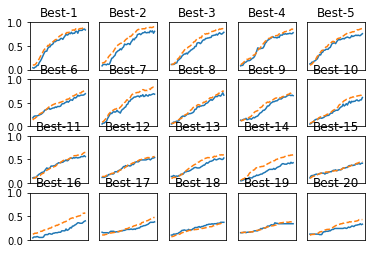

In [7]:
print('========== Hyper-Parameter Optimization Result ==========')
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x: x[1][-1], reverse=True):
    print('Best-' + str(i+1) + '(val acc:' + str(val_acc_list[-1]) + ') | ' + key)
    
    plt.subplot(row_num, col_num, i+1)
    plt.title('Best-' + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], '--')
    i += 1
    
    if i >= graph_draw_num:
        break
        
plt.show()